In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv('FIFA_raw_data.csv')
df = raw_data.copy()
df = df.drop(['ID', 'LongName', 'photoUrl', 'playerUrl'], axis = 1)
df = df.rename(columns={'↓OVA':'OVA'})
df["Club"]=df["Club"].str.strip("\n\n\n\n")
df['Height'] = df['Height'].str.replace('cm', '')
def ft_to_cm(x):
    if "'" in x:
        parts = x.replace('"', '').split("'")
        feet = float(parts[0])
        inches = float(parts[1]) if parts[1] else 0
        cm = round((feet * 30.48) + (inches * 2.54), 0)
        return int(cm)
    else:
        return int(x)

df["Height"]=df["Height"].apply(ft_to_cm)
df["Height"].unique()
df['Weight'] = df['Weight'].str.replace('kg', '')
def lbs_to_kg(x):
    if "lbs" in x:
        lbs = x.replace("lbs", "")
        kg = round(int(lbs) / 2.2, 0)
        return int(kg)
    else:
        return int(x)

df['Weight'] = df['Weight'].apply(lbs_to_kg)
df.rename(columns={'Height':'Height(cm)','Weight':'Weight(kg)'},inplace =True)
def money(x):
    if "€" in x:
        x = x.replace("€", "")
    if "M" in x:
        x=x.replace("M", "")
        return int(float(x) * 1000000)
    elif "K" in x:
        x = x.replace("K", "")
        return int(float(x) * 1000)

    return int(x)

df['Value'] = df['Value'].apply(money)
df['Wage'] = df['Wage'].apply(money)
df['Release Clause'] = df['Release Clause'].apply(money)

df.rename(columns = {'Value':'Value (€)', "Wage":"Wage (€)"})

df['W/F'] = df['W/F'].str.replace("★", "")
df['SM'] = df['SM'].str.replace("★", "")
df['IR'] = df['IR'].str.replace("★", "")

df.rename(columns = {'W/F':'Weak Foot /5', "SM":"Skill Moves /5", "IR": "International Reputation /5"}, inplace = True)

def type(x):
    if "Free" in x:
        return "Free"
    if "Loan" in x:
        return "Loan"
    if "~" in x:
        return "Contract"
    else:
        return pd.NA

def start_time_contract(x):
    if "~" in x:
        return  int(x[:4])
    if "Loan" in x:
        x=x.strip(" On Loan")
        x= datetime.strptime(x, "%b %d, %Y")
        return x.date()
    else:
        return pd.NA

def end_time_contract(type,contract,loan):
    if type == "Contract":
        return int(contract[-4:])
    if type == "Loan":
        loan = datetime.strptime(loan, "%b %d, %Y")
        return loan.date()

    else:
        return pd.NA

df["Type of contract"] = df["Contract"].apply(type)
df["Start year"] = df["Contract"].apply(start_time_contract)
df["End year"] = df.apply(lambda row: end_time_contract(row["Type of contract"],row["Contract"],row["Loan Date End"] ), axis=1)

C:\Users\Ben\AppData\Local\Temp\ipykernel_12380\3220113521.py:4: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('FIFA_raw_data.csv')


In [110]:
pd.options.display.max_columns = None
df.head()

,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot /5,Skill Moves /5,A/W,D/W,International Reputation /5,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Type of contract,Start year,End year
0,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,Contract,2004,2021
1,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,Contract,2018,2022
2,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,Contract,2014,2023
3,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,Contract,2015,2023
4,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,Contract,2017,2022


In [111]:
df[['Type of contract','Start year','End year']].head()

,Type of contract,Start year,End year
0,Contract,2004,2021
1,Contract,2018,2022
2,Contract,2014,2023
3,Contract,2015,2023
4,Contract,2017,2022


In [112]:
df['Type of contract'].unique()

array(['Contract', 'Loan', 'Free'], dtype=object)

In [3]:
df["Attacking"]=round(df["Attacking"]/5,0)
df["Attacking"]=df["Attacking"].astype("int64")

df["Skill"]=df["Skill"]/5
df["Skill"]=df["Skill"].astype("int64")


df["Movement"]=df["Movement"]/5
df["Movement"]=df["Movement"].astype("int64")


df["Power"]=df["Power"]/5
df["Power"]=df["Power"].astype("int64")


df["Mentality"]=df["Mentality"]/6
df["Mentality"]=df["Mentality"].astype("int64")

df["Defending"]=df["Defending"]/3
df["Defending"]=df["Defending"].astype("int64")

df["Goalkeeping"] = df["Goalkeeping"]/5
df["Goalkeeping"] = df["Goalkeeping"].astype("int64")

df=df.rename(columns={"Attacking":"Attacking AVG", "Skill":"Skill AVG", "Movement":"Movement AVG",
                    "Power":"Power AVG", "Mentality":"Mentality AVG", "Defending":"Defending AVG", "Goalkeeping":"Goalkeeping AVG"} )

In [114]:
df[['Name','OVA','Attacking AVG','Skill AVG','Movement AVG','Power AVG','Mentality AVG','Defending AVG','Goalkeeping AVG']].head()

,Name,OVA,Attacking AVG,Skill AVG,Movement AVG,Power AVG,Mentality AVG,Defending AVG,Goalkeeping AVG
0,L. Messi,93,86,94,90,77,57,30,10
1,Cristiano Ronaldo,92,87,82,86,88,58,28,11
2,J. Oblak,91,19,21,61,53,23,19,87
3,K. De Bruyne,91,81,88,79,81,68,62,11
4,Neymar Jr,91,82,89,90,71,59,31,11


In [5]:
df = df.drop(['Hits'], axis=1)

In [116]:
df.head()

,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking AVG,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill AVG,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement AVG,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power AVG,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality AVG,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending AVG,Marking,Standing Tackle,Sliding Tackle,Goalkeeping AVG,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot /5,Skill Moves /5,A/W,D/W,International Reputation /5,PAC,SHO,PAS,DRI,DEF,PHY,Type of contract,Start year,End year
0,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000,560000,138400000,86,85,95,70,91,88,94,96,93,94,91,96,90,91,80,91,94,95,77,86,68,72,69,94,57,44,40,93,95,75,96,30,32,35,24,10,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,Contract,2004,2021
1,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000,220000,75900000,87,84,95,90,82,86,82,88,81,76,77,92,86,87,91,87,95,71,88,94,95,84,78,93,58,63,29,95,82,84,95,28,28,32,24,11,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,Contract,2018,2022
2,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000,125000,159400000,19,13,11,15,43,13,21,12,13,14,40,30,61,43,60,67,88,49,53,59,78,41,78,12,23,34,19,11,65,11,68,19,27,12,18,87,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,Contract,2014,2023
3,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000,370000,161000000,81,94,82,55,94,82,88,88,85,83,93,92,79,77,76,78,91,76,81,91,63,89,74,91,68,76,66,88,94,84,91,62,68,65,53,11,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,Contract,2015,2023
4,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,132000000,270000,166500000,82,85,87,62,87,87,89,95,88,89,81,95,90,94,89,96,91,83,71,80,62,81,50,84,59,51,36,87,90,92,93,31,35,30,29,11,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,Contract,2017,2022


In [117]:
df.columns

Index(['Name', 'Nationality', 'Age', 'OVA', 'POT', 'Club', 'Contract',
       'Positions', 'Height(cm)', 'Weight(kg)', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Attacking AVG', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill AVG',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement AVG', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power AVG', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality AVG', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending AVG',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping AVG',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot /5',
       'Skill Moves /5', 'A/W', 'D/W', 'International Reputation /5

In [7]:
df_columns = ['Name', 'Nationality', 'Age', 'OVA', 'POT', 'Club', 'Contract',
       'Positions', 'Height(cm)', 'Weight(kg)', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined','Type of contract', 'Start year',
       'End year', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Attacking AVG', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill AVG',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement AVG', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power AVG', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality AVG', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending AVG',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping AVG',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot /5',
       'Skill Moves /5', 'A/W', 'D/W', 'International Reputation /5', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY',]

In [9]:
df=df[df_columns]

In [11]:
df.head()

,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),...,Skill Moves /5,A/W,D/W,International Reputation /5,PAC,SHO,PAS,DRI,DEF,PHY
0,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,...,4,Medium,Low,5,85,92,91,95,38,65
1,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,...,5,High,Low,5,89,93,81,89,35,77
2,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,...,1,Medium,Medium,3,87,92,78,90,52,90
3,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,...,4,High,High,4,76,86,93,88,64,78
4,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,...,5,High,Medium,5,91,85,86,94,36,59


In [138]:
type(df['Joined'][0])

<NA>

In [13]:
df=df.drop(columns=['Loan Date End','Joined'])

In [144]:
df.head()

,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Type of contract,Start year,End year,Loan Date End,Value,Wage,Release Clause,Attacking AVG,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill AVG,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement AVG,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power AVG,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality AVG,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending AVG,Marking,Standing Tackle,Sliding Tackle,Goalkeeping AVG,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot /5,Skill Moves /5,A/W,D/W,International Reputation /5,PAC,SHO,PAS,DRI,DEF,PHY
0,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",Contract,2004,2021,NaN,103500000,560000,138400000,86,85,95,70,91,88,94,96,93,94,91,96,90,91,80,91,94,95,77,86,68,72,69,94,57,44,40,93,95,75,96,30,32,35,24,10,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65
1,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",Contract,2018,2022,NaN,63000000,220000,75900000,87,84,95,90,82,86,82,88,81,76,77,92,86,87,91,87,95,71,88,94,95,84,78,93,58,63,29,95,82,84,95,28,28,32,24,11,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77
2,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",Contract,2014,2023,NaN,120000000,125000,159400000,19,13,11,15,43,13,21,12,13,14,40,30,61,43,60,67,88,49,53,59,78,41,78,12,23,34,19,11,65,11,68,19,27,12,18,87,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90
3,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",Contract,2015,2023,NaN,129000000,370000,161000000,81,94,82,55,94,82,88,88,85,83,93,92,79,77,76,78,91,76,81,91,63,89,74,91,68,76,66,88,94,84,91,62,68,65,53,11,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78
4,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",Contract,2017,2022,NaN,132000000,270000,166500000,82,85,87,62,87,87,89,95,88,89,81,95,90,94,89,96,91,83,71,80,62,81,50,84,59,51,36,87,90,92,93,31,35,30,29,11,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         18979 non-null  object
 1   Nationality                  18979 non-null  object
 2   Age                          18979 non-null  int64 
 3   OVA                          18979 non-null  int64 
 4   POT                          18979 non-null  int64 
 5   Club                         18979 non-null  object
 6   Contract                     18979 non-null  object
 7   Positions                    18979 non-null  object
 8   Height(cm)                   18979 non-null  int64 
 9   Weight(kg)                   18979 non-null  int64 
 10  Preferred Foot               18979 non-null  object
 11  BOV                          18979 non-null  int64 
 12  Best Position                18979 non-null  object
 13  Type of contract             18

In [15]:
df_type = df.copy()

In [166]:
pd.unique(df['A/W'])

array(['Medium', 'High', 'Low'], dtype=object)

In [168]:
pd.unique(df['D/W'])

array(['Low', 'Medium', 'High'], dtype=object)

In [17]:
df = df.astype({'Weak Foot /5': 'int64', 'Skill Moves /5': 'int64', 'International Reputation /5' : 'int64' }).dtypes

In [176]:
df.info()

<class 'pandas.core.series.Series'>
Index: 73 entries, Name to PHY
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
73 non-null     object
dtypes: object(1)
memory usage: 3.2+ KB


In [19]:
df.head()

Name           object
Nationality    object
Age             int64
OVA             int64
POT             int64
dtype: object

In [21]:
df = df_type

In [182]:
df.head()

,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Type of contract,Start year,End year,Value,Wage,Release Clause,Attacking AVG,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill AVG,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement AVG,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power AVG,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality AVG,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending AVG,Marking,Standing Tackle,Sliding Tackle,Goalkeeping AVG,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot /5,Skill Moves /5,A/W,D/W,International Reputation /5,PAC,SHO,PAS,DRI,DEF,PHY
0,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,Contract,2004,2021,103500000,560000,138400000,86,85,95,70,91,88,94,96,93,94,91,96,90,91,80,91,94,95,77,86,68,72,69,94,57,44,40,93,95,75,96,30,32,35,24,10,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65
1,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,Contract,2018,2022,63000000,220000,75900000,87,84,95,90,82,86,82,88,81,76,77,92,86,87,91,87,95,71,88,94,95,84,78,93,58,63,29,95,82,84,95,28,28,32,24,11,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77
2,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,Contract,2014,2023,120000000,125000,159400000,19,13,11,15,43,13,21,12,13,14,40,30,61,43,60,67,88,49,53,59,78,41,78,12,23,34,19,11,65,11,68,19,27,12,18,87,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90
3,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,Contract,2015,2023,129000000,370000,161000000,81,94,82,55,94,82,88,88,85,83,93,92,79,77,76,78,91,76,81,91,63,89,74,91,68,76,66,88,94,84,91,62,68,65,53,11,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78
4,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,Contract,2017,2022,132000000,270000,166500000,82,85,87,62,87,87,89,95,88,89,81,95,90,94,89,96,91,83,71,80,62,81,50,84,59,51,36,87,90,92,93,31,35,30,29,11,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59


In [23]:
df[['Weak Foot /5', 'Skill Moves /5', 'International Reputation /5']] = df[['Weak Foot /5', 'Skill Moves /5', 'International Reputation /5']]\
.apply(pd.to_numeric)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         18979 non-null  object
 1   Nationality                  18979 non-null  object
 2   Age                          18979 non-null  int64 
 3   OVA                          18979 non-null  int64 
 4   POT                          18979 non-null  int64 
 5   Club                         18979 non-null  object
 6   Contract                     18979 non-null  object
 7   Positions                    18979 non-null  object
 8   Height(cm)                   18979 non-null  int64 
 9   Weight(kg)                   18979 non-null  int64 
 10  Preferred Foot               18979 non-null  object
 11  BOV                          18979 non-null  int64 
 12  Best Position                18979 non-null  object
 13  Type of contract             18

# Final Checkpoint

Creating a final checkpoint and readying data to be exported

In [27]:
df_preprocessed = df.copy()

In [193]:
import pymysql

In [197]:
df = df.drop(['Contract'], axis=1)

In [203]:
df.columns

Index(['Name', 'Nationality', 'Age', 'OVA', 'POT', 'Club', 'Positions',
       'Height(cm)', 'Weight(kg)', 'Preferred Foot', 'BOV', 'Best Position',
       'Type of contract', 'Start year', 'End year', 'Value', 'Wage',
       'Release Clause', 'Attacking AVG', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill AVG',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement AVG', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power AVG', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality AVG', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending AVG',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping AVG',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot /5',
       'Skill Moves /5', 'A/W', 'D/W', 'International Reputa

In [205]:
import pymysql

In [207]:
conn = pymysql.connect(database = 'fifa_db', user = 'root', password = 'brandn3w')

In [209]:
cursor = conn.cursor()

In [227]:
insert_query = 'INSERT INTO predicted_outputs VALUES '

In [231]:
for i in range(df.shape[0]):
    insert_query += '('

    for j in range(df.shape[1]):
        insert_query += str(df[df.columns.values[j]][i]) + ', '

    insert_query = insert_query[:-2] + '), '

KeyboardInterrupt: 

In [233]:
df.to_csv('fifa_db.csv')  

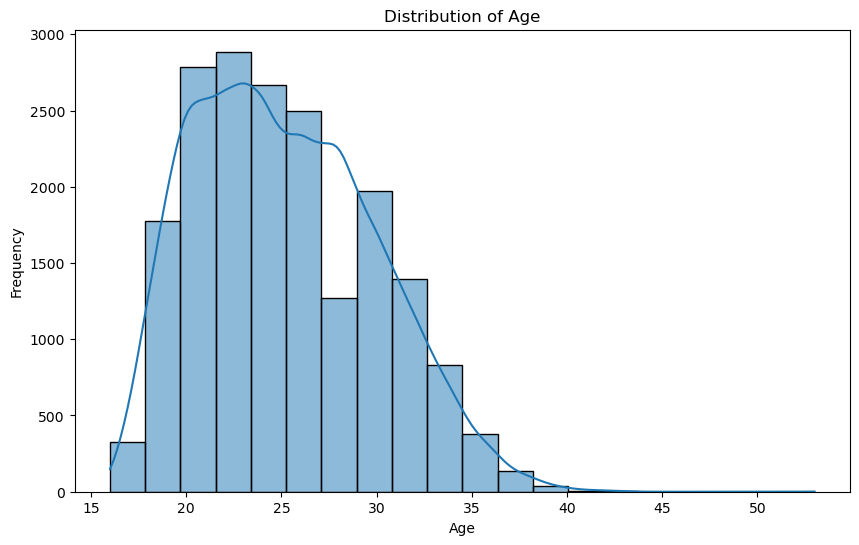

In [35]:
# Histogram for Age
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()